In [1]:
import pyMelt as m
from pyMelt.chemistry import BatchSpecies
import pyMelt.meltingcolumn_classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lz = m.lithologies.matthews.klb1()
px = m.lithologies.matthews.kg1()
mantle = m.Mantle([lz, px],[1.0, 0.2],['lz', 'px'])
column1 = mantle.AdiabaticMelt(1450)
column2 = mantle.AdiabaticMelt(1450)

In [3]:
column1.calculate_chemistry(elements = {'lz': m.chemistry.workman05_ddm,
                                        'px': m.chemistry.stracke03_bsic}, 
                           D = m.chemistry.workman05_D,
                           method='continuous',
                           output_type='instantaneous'
                           )
column2.calculate_chemistry(elements = {'lz': m.chemistry.workman05_ddm,
                                        'px': m.chemistry.stracke03_bsic}, 
                           D = m.chemistry.workman05_D,
                           method='continuous',
                           output_type='accumulated'
                           )

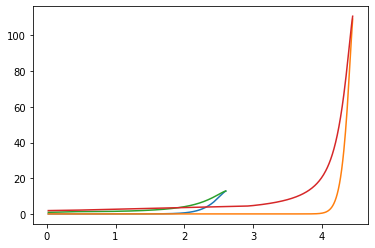

In [4]:
f,a = plt.subplots()
a.plot(column1.lithologies['lz'].Pressure, column1.lithologies['lz'].La)
a.plot(column1.lithologies['px'].Pressure, column1.lithologies['px'].La)
a.plot(column2.lithologies['lz'].Pressure, column2.lithologies['lz'].La)
a.plot(column2.lithologies['px'].Pressure, column2.lithologies['px'].La)
plt.show()

In [5]:
morb1 = pyMelt.geosettings.SpreadingCentre(column1)
morb2 = pyMelt.geosettings.SpreadingCentre(column2)

/Users/simonmatthews/opt/anaconda3/lib/python3.7/site-packages/pyMelt/geosettings.py:237: UserWarning: When homogenising instantaneous melts numerical error is likely to be introduced due to discretisation. This will affect the most incompatible elements most severely.
  warn("When homogenising instantaneous melts numerical error is likely to be "


In [12]:
morb1.lithologies['lz'].Pressure

0      8.011807
1      8.003817
2      7.995827
3      7.987837
4      7.979847
         ...   
937    0.525177
938    0.517187
939    0.509197
940    0.501207
941    0.493217
Name: Pressure, Length: 942, dtype: float64

In [6]:
morb1.chemistry

Rb        0.912665
Ba       10.510633
Th        0.142656
U         0.046485
Nb        3.102114
Ta        0.197803
La        2.903460
Ce        9.655623
Pb        0.180507
Pr        0.331648
Nd       11.712214
Sr      132.569767
Zr      100.611490
Hf        2.836975
Sm        4.228269
Eu        1.632202
Ti    11997.006146
Gd        6.229340
Tb        0.174548
Dy        7.627287
Ho        0.263833
Y        43.839555
Er        4.711748
Yb        4.450934
Lu        0.671020
dtype: float64

In [7]:
morb2.chemistry

Rb        0.981895
Ba       11.295047
Th        0.151872
U         0.049349
Nb        3.253453
Ta        0.207438
La        2.983438
Ce        9.812473
Pb        0.184139
Pr        0.332975
Nd       11.859060
Sr      134.511346
Zr      101.805029
Hf        2.868570
Sm        4.265888
Eu        1.645321
Ti    12080.848063
Gd        6.274584
Tb        0.174724
Dy        7.666192
Ho        0.264013
Y        44.035482
Er        4.730856
Yb        4.465633
Lu        0.673110
dtype: float64

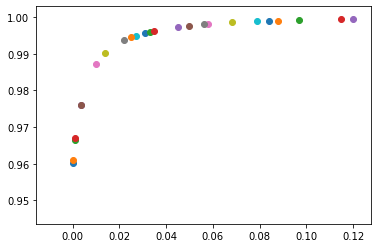

In [12]:
rel = morb1.chemistry/morb2.chemistry
f,a = plt.subplots()
for el in rel.keys():
    a.scatter(pyMelt.chemistry.workman05_D[el],rel[el])
plt.show()

In [13]:
oib1 = pyMelt.geosettings.OceanIsland(column1, P_lithosphere=1.0, relative_density=0.2)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.36948419 4.16353525 0.05872478 ... 1.99636324 1.93172819 0.30033968]
 [0.36805486 4.14742873 0.0584976  ... 1.99251041 1.92849317 0.29985514]
 [0.36665684 4.13167514 0.0582754  ... 1.98872291 1.9253116  0.29937855]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.8153008  9.44036244 0.12737556 ... 4.86180488 4.6488285  0.69978545]
 [0.81307845 9.41462987 0.12702836 ... 4.8485625  4.63619322 0.6978854 ]
 [0.81085554 9.3888908  0.12668107 ... 4.83531635 4.62355345 0.69598461]]


/Users/simonmatthews/opt/anaconda3/lib/python3.7/site-packages/pyMelt/geosettings.py:442: UserWarning: When homogenising instantaneous melts numerical error is likely to be introduced due to discretisation. This will affect the most incompatible elements most severely.
  warn("When homogenising instantaneous melts numerical error is likely to be "


In [14]:
oib2 = pyMelt.geosettings.OceanIsland(column2, P_lithosphere=1.0, relative_density=0.2)

In [15]:
oib1.chemistry

Rb        2.633980
Ba       30.429960
Th        0.412111
U         0.130031
Nb        9.172906
Ta        0.584010
La        8.364999
Ce       29.149009
Pb        0.486117
Pr        0.485540
Nd       36.480535
Sr      401.932527
Zr      313.937263
Hf        8.804244
Sm       13.316598
Eu        5.161665
Ti    38353.736512
Gd       19.926306
Tb        0.276099
Dy       24.885723
Ho        0.421878
Y       142.874895
Er       15.587387
Yb       14.919067
Lu        2.251555
dtype: float64

In [16]:
oib2.chemistry

Rb        2.866034
Ba       33.065710
Th        0.443311
U         0.139604
Nb        9.700600
Ta        0.617584
La        8.653499
Ce       29.755980
Pb        0.499194
Pr        0.488564
Nd       37.070751
Sr      409.537690
Zr      318.764541
Hf        8.932615
Sm       13.473734
Eu        5.217084
Ti    38713.704664
Gd       20.119904
Tb        0.276647
Dy       25.057742
Ho        0.422507
Y       143.747698
Er       15.673016
Yb       14.985242
Lu        2.260965
dtype: float64

In [7]:
c = column2.lithologies['lz'].drop(['Pressure','T','F'], axis=1, inplace=False).to_numpy()

In [14]:
f = column2.lithologies['lz'].F.to_numpy()

In [9]:
c = np.nan_to_num(c, nan=0.0)

In [17]:
df = f[1:] - f[:-1]


In [37]:
for i in range(len(c)-1):
    if np.sum(df[:i]) > 0:
        cnormed[i+1,:] = np.sum(c[1:i+1, :]*df[:i, None], axis=0)/np.sum(df[:i])
    else:
        cnormed[i] = 0

In [38]:
c[1:2,:]*df[:1, None]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [39]:
df[:1, None]

array([[0.]])

In [40]:
cnormed

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.69550509, 7.80680149, 0.1069323 , ..., 1.962808  , 1.88380217,
        0.29246444],
       [0.68559942, 7.6957221 , 0.10542236, ..., 1.94693246, 1.86996776,
        0.29037238],
       [0.67575377, 7.58531319, 0.10392124, ..., 1.93090106, 1.85596747,
        0.28825409]])

In [42]:
norm.sum(axis=0)/f.sum()

array([2.99639628e-01, 3.37236111e+00, 4.71455527e-02, 1.90889578e-02,
       8.77554202e-01, 5.67307767e-02, 1.10607130e+00, 3.03448014e+00,
       1.02177351e-01, 5.80226179e-01, 3.10795332e+00, 4.18461620e+01,
       2.70023208e+01, 8.28608298e-01, 1.22024284e+00, 4.82176548e-01,
       3.50535993e+03, 1.76334229e+00, 3.31685587e-01, 2.31012508e+00,
       5.17773356e-01, 1.47953645e+01, 1.50393038e+00, 1.49191156e+00,
       2.33486457e-01])

In [43]:
np.shape(column2.lithologies['lz'])

(101, 28)

In [44]:
pd.Series(np.array([1,2,3]), index=['a','b','c'])

a    1
b    2
c    3
dtype: int64

In [67]:
t = column1.F[1:].to_numpy() - column1.F[:len(column1.F)-1].to_numpy()

In [68]:
t

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00366622, 0.00568956, 0.00631783, 0.00672523, 0.00703707,
       0.00729673, 0.00752423, 0.00773037, 0.00792157, 0.00810197,
       0.00827435, 0.00844067, 0.00860237, 0.00876053, 0.00891

In [69]:
t[:-1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00366622, 0.00568956, 0.00631783, 0.00672523, 0.00703707,
       0.00729673, 0.00752423, 0.00773037, 0.00792157, 0.00810197,
       0.00827435, 0.00844067, 0.00860237, 0.00876053, 0.00891